# Generelt
**Instuktor:**  
**Navn:** Benjamin Barslev Nielsen  
**Mail:**  <a href="mailto:barslev@cs.au.dk">barslev@cs.au.dk</a>  
**Kontor:**  Turing 218

# High level database models
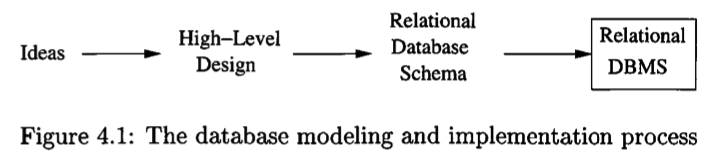

## Entity / Relationship model
In the **entity-relationship model** is represented graphically as an entity-relationship diagram using tree principle element types
1. Entity sets
2. Attributes
3. Relationships
___

- An **entity** is an abstract object 
- A collection of similar entities forms an **entity set**
- Entity sets have assosiated **attributes**, which are properties of the entities of that set (e.g. title or length on movies)
- **Relationsships** are connections between two or more entity sets
- It is possible that a entity set appears more than one time in a relationship
    - If so the edges are labeled between the entity set and the relationsship by names, which is called **roles**
- We can assosiate attributes to relationships 
- We can use **isa** relations to make a subclass of a entity set (a triangle in diagram)
    - They are all one-one

### Entity / Relationsship diagram
- A E/R diagram is a graph representing entity sets, attributes and relationships
- The elements are represented by nodes on the graph where the shapes are the following
    - Entity sets are represented by rectangles
    - Attributes are represented by ovals
    - Relationships are represented by diamonds
    
<img src="img/ER_diagrams_ex.png" style="height: 250px" />
<center>E/R diagram example</center>

### Multiplicy of Binary E/R Relationships
- There are often restriction of the multiplicy of the relationships
- If each member from $E$ can be connected by $R$ to at most one member from $F$, $R$ is a **many-one** from $E$ to $F$ 
- If there is many-one both ways we say that $R$ is **one-one**
- If $R$ is not many-one either way we say that $R$ is **many-many**
- If $R$ is excacly one it means that there cannot be zero (round arrow)
- In a E/R diagram a arrow points on the elements there only can be one of 
    - The arrow means at most one
    - If there is more than two in the relationship an arrow poiting to a entry means only one can be selected for the concreate entity sets
- If we want to make a multiway relationship into a binary one we can make new entity sets with new relationships to the original ones
 
### Contraints 
- A **key** for a set $E$ is a set $K$ of one or more attributes such that if given any two distinct enties they cannot have a identical value for the attributes in $K$
    - Every entity set must have a key, though in some cases the key belongs to another entity set
    - There can be more than one key for an entity set though one key is often used as the primary key
    - When a entity set i envovled in a isa-hierarchy we require the root to have all attributes needed for a key and that the key is found in the *"subclasses"*
    - In the E/R diagram attributes belonging to a key are underlined
    

- A rounded arrow is used to show that there must be one in that relationsship
- To indicate the limited on a many-many, many-one or one-many relationship a bording number i attached to the edges

## Weak Entity Sets
- A weak entity set is depended on another entity set for part of its keys
- If $E$ is a weak entity set its keys consist of 
    1. Zero or more of its own attributes
    2. Key attributes that are reached by certain many-one relationships are called **supporting relationsships** for $E$ and the entity sets reached from $E$ are **supporting entity sets**
    
___ 
- For $R$, a many-one relationship from $E$ to some entity set $F$ to be a supporting relationsship for $E$ the following must be the case
    1. $R$ must be a binary many-one relationship from $E$ to $F$
    2. $R$ must have referential integrety from $E$ to $F$, there must be exactly one entity in $F$ for each $E$
    3. The attributes that $F$ supplies for $E$ must be key attributes
    4. If $F$ itself is week some of all the key attributes must be supplied from some other supporting relationsship and so on
    5. If there are several suporting relationsships from $E$ to $F$ then each relationship is used to supply a copy of the key to help for the key for $E$

___

- To show that a entity set is weak it will be shown as a rectangle with double border
- A supporting relationship is shown with a double diamond
- If a entity set supplies attributes for its own key those attributes will be underlined 

## Design principles
- It is important that the design is **faithful** to the specifications of the application, so that the entity sets reflect reality 
- It is important to **avoid redundancy** so that the same information is not repeated
- **Simplicity counts** - avoid introducting more elements into your design than necessary.
- **Choosing the Right Relationships** is important, because not doing so can lead to redudancy 
- **Picking the Right Kind of Element** - it is important to have the right balance between attributes and relationships 
___
- $E$ is a entity set if $E$ followes the following conditions then we can replace $E$ by an attribute or attributes of other entity sets
    1. All relationships which involve $E$ have a arrow entering $E$
    2. If $E$ has more than one attribute no attribute depends on the other attributes 
    3. No relationship involves $E$ more than once 
    
    
- If conditions are met $E$ can be replaced as follows
    1. If there is a many-one relationsship $R$ from $F$ to $E$ then remove $R$ and make the attributes of $E$ attributes of $F$ suitably renamed
    2. If $E$ is in a multiway relationship make the attributes of $E$, attributes of the relationship and delete the arc to $E$ and $E$


## Converting E/R diagrams into relational schemas
- Entity set $\rightarrow$ table
- Attribute $\rightarrow$ attribute
- Relationship $\rightarrow$ table *(Where attributes are keys or relationship attributes)*
- We can simplify a generated table by have the id of the one part in the many part
___    
    
- To handle subclasses there are tree options
    - The NULL technique
        - Uses a single table
        - Uses NULLs for missing attributes
    - Object oriented 
        - For each possible subtree including the root create one relation
        - The scheme includes alle the attributes of all the entity sets in the subtreee
    - The E/R technique
        - One table for each subclass
        - Attributes are keys and local attributes
___

- If we have a weak entity set $W$, construct for $W$ a relation whose scheme consists of
    1. All attributes of $W$
    2. All attributes of supporting relationships for $W$
    3. For each supporting relationship for $W$, say a many-one relationship from $W$ to entity set $E$, all the key attributes of $E$


- Rename attributes if conflicts
- Do ***not*** construct a relation for any supporting relationship for $W$

# Relational models of data

## Data model overview
- DMBS is short for Database Mangement System
    - Efficient, convenient and safe storage of large amount of persistent data with multi user access 
    
    
- A **data model** is the notation for describing data or information


- The description of a data model generally consists of three parts:
    - Structure of data: 
        - tables / relations
        - sets, multisets, lists
        - tree, graphs 
    - Operations on the data: 
        - insert, delete, update, query
    - Contraints on data: 
        - data types
        - uniqueness
        - dependencies
    
    
- The two most important kinds of database models to days are
    - The relational model: Consists of tables
    - The semistructured model: resemples trees of graphs
    
    
- A relational models is prefered over a semistructured model because:
    1. Provides a simple model, limited approach, yet everything anything can be modeled
    2. Provides a limited yet usefull set of operations
    
    
- Operations on data in a relational model can be done in must less code, than alternative models

## The relational model
- The relational model gives us a simple way to represent data as a two-dimentional table called a relation
- The columns of the relation is called attributes
- Relations start with a capital letter and attributes don't


- The name of the relation and the set of attributes for a relation is called the schema for that relation
    - A schema is showed with the relation name and then a parenthesized list of attributes
    - The attributes of a relation is a set not a list, but to the attributes in a schema is in a order
    - The set of schemas for the relations of a database is called a relational database schema or a database schema
    - Example schema: `Movies(title, year, length, genre)`
    
    
- The rows of a database other than the header row are called tuples 
    - A tuple has one component for each attribute of the relation
    - Example tuple: `(Gone With the Wind, 1939, 231, drama)`
    
    
- Each row has a domain which is the type of data the row can cotain
    - The domain can be include in the schema
    - Example of domain in schema: `Movies(title:string, year:integer, length:integer, genre:string)`
    
    
- The order in which the tuples are represented is not important
- The set of attributes in a relation can be changed, but it is often very expensive to add a attribute in larger relations 


- A set of tuples of a relation is called a instance of that relation
    - The instance of the relation changes over time as there is add or deleted tuples in the relation
    - The set of tuples that are in the relation now is called the current instance 


- One kind of contraint on a database is key constraints
    - A set of attributes forms the key for that relation if we do not allow to tuples of attributes to contain the same value
    - A attribute is in the set that forms a key if it is underlined
    - Many real world databases use unique id's for keys
    

# SQL 
- SQL is the principle language to descibe and manipulate relational databases
- There are two aspects of SQL
    1. The **Data-defining** sublanguage for defining database schemas
    2. The **Data-manipulating** sublanguage for querying and for modifying the database.


- SQL makes distinction between three kinds of relations
    1. Stored relations called tables
        - A relation that exists in the database and that can be modified by changing its tuples and queried
    2. Views
        - Relations defined by computation
        - Not stored but constructed when needed
    3. Temporary tables
        - Constructed by the language processor when needed
        - Thrown away and not stored

## Data types
- All attributes must have a data type
- Primitive types supported by SQL systems
    1. Character strings of fixed of varying length
        - `CHAR(n)` denotes a fixed length string of up to `n` characters and implies that short strings are padded to make `n` characters
        - `VARCHAR(n)` also denotes a fixed length string of up to `n` characters and implies that a string-length is used
    2. Bit strings of fixed or varying length
        - Their values are strings of bits 
        - `BIT(n)` denotes bit strings of length `n`
        - `BIT VARYING(n)` denotes bit strings of length up to `n`
    3. Boolean type
        - Denoted by `BOOLEAN`
        - Denotes that an attribute value is logical
        - Possible values are TRUE, FALSE or UNKNOWN
    4. Integer type
        - Denoted by `INT` or `INTEGER`
        - Denotes typical integer values
        - `SHORTINT` can also be used but the number of bits might be less
    5. Floating-point numbers
        - `FLOAT` or `REAL` are used for typical floating number
        - Higher precision can be optained with `DOUBLE PRECISION`
        - `DECIMAL(n,d)` allows values that consist of `n` decimal digist width the decimal point assumed to be `d` positions to the right
        - `NUMERIC` can be a synonym for `DECIMAL`, but there are possible implementation difference
    6. Date and time
        - `DATE` denotes a date value 
        - A date value is the keyword `DATE`followed by a quoted string on the form *'yyyy-mm-dd'*
        - `TIME` denotes a time value
        - A time value is the keyword `TIME` followed by a quoted string on the form *'hh-mm-ss'*
        - Fractions of a seconds can also be used in the time value at the seconds position
        - Minus or plus after the time is used to describe the timezone
        - The `TIME STAMP` keyword can be used to combine date and time.
        - A time stamp value is the keyword `TIME STAMP` followed by  *'yyyy-mm-dd hh-mm-ss'*
        
        
## Data-defining sublanguage (DDL)

### Declaring tables
- The SQL `CREATE TABLE` statement declares the schema for a stored relation
    - Gives a name for the table, its attributes and their datatype
    - Allows us to declare a key or several keys
    - Also allows for constraints
___

- To declarate a relation schema the keywords `CREATE TABLE` is used
    - Is followed by the name of the relation and the a parenthesized comma-separated list of the attribute names and their types 
    - `NOT NULL` can be used after the declaration to require that the value can't be null
    - Example of declaration of a relation schema
    ```mysql 
    CREATE TABLE Movies (
        title CHAR(100), 
        year INT, 
        length INT,
        genre CHAR(10), 
        studioName CHAR(30), 
        producerC INT
    );
    ```

### Modifying tables
- A relation `R` can be deleted by the SQL statement:
```mysql
DROP TABLE R;
```
___
- We can modify a relation schema by using the keywords `ALTER TABLE` and the name of the relation 
- The options when modifing a relation schema are
    1. `ADD` followed by an attribute name and its data type
    2. `DROP` followed by an attribute name
- When adding a new attribute the value for that attribute in all existing tuples is set to `NULL`    
- Examples: 
```mysql
ALTER TABLE MovieStar ADD phone CHAR(16);
ALTER TABLE MovieStar DROP birthdate
```

### Default values 
- To set a default value, we add the keyword `DEFAULT` and the appropriate value, any place we decalare an attribute and its data type. 
    - The value is either `NULL` or a constant value or other values provided by the system such as current time


Example:
```mysql
ALTER TABLE MovieStar ADD phone CHAR(16) DEFAULT 'unlisted';
```


### Declaring Keys
- There are two ways of declaring a attribute to be a key in the `CREATE TABLE` statement
    1. We may declare one attribute to be a key when that attribute is listed
    2. We may add to the list of items declared an addition declaration that says a particular attribute or set of attributes forms the key

___

- There are two declartions that can be used to indicate keynedd
    1. `PRIMARY KEY`
    2. `UNIQUE`
    
    
- When one or more key(s) is declared two tuples cannot agree on all attributes in the set `S` where `S` is the key for the relation `R`
- If `PRIMARY KEY` is used, then attributes in `S` are not allowed to have `NULL` as a value for their components
- If the set `S` is declared `UNIQUE` the `NULL` value is permitted 
- Examples:

```mysql

CREATE TABLE MovieStar (
    name CHAR(30) PRIMARY KEY,
    address VARCHAR(255),
    gender CHAR(1),
    birthdate DATE
);

CREATE TABLE Movies (
    title CHAR(100),
    year INT,
    length INT,
    genre CHAR(10),
    studioName Char(30),
    producerC INT,
    PRIMARY KEY (title, year)
);

```

## Data-manipulating sublanguage (DML)
- The order of clause is `SELECT`, `FROM`, `WHERE`, `GROUP BY`, `HAVING` and `ORDER BY`


- The most used keywords in all SQL queries, uses the three keywords
    - `FROM`, which gives the relation or relations to which the query refers
    - `WHERE`, which is a condition the tuples must satisfy to match the query
    - `SELECT`, tells us which attributes of the tuple are produced as a part of the answer


- Example:

```mysql
SELECT title, length
FROM Movies
WHERE studioName = 'Disney' AND year = 1990;
```

- The `AS` keyword can be used to give the attribute an alias for the given query e.g.
    ```mysql 
    SELECT title AS name, length AS duration FROM Movies
    ```


- We can also use an expression in place of an attribute in the query e.g.
    ```mysql
    SELECT title AS name, length*0.016667 AS lengthInHours
    ```
    
- A constant can also be used in the query in the place of an attribute e.g.
    ```mysql
    SELECT title AS name, length*0.016667 AS lengthInHours, 'hrs.' AS inHours 
    ```


- The expressions followed by the `WHERE` clause include condinal expression such as: =, <>, <, >, <=, >=, where <> means != and = means ==
    - `||` can be used to concat to strings
    - The valued that are compared may also be applied the usual arithmetic operators +, \* and so on
    
- When > or < are used on strings it compares the lexicographic order

### Pattern Matching
- To match a string `s` against a pattern `p` the following syntax is used and returnes `true` if and only if `s` matches `p`
```mysql
s LIKE p
```
- A pattern is a string the the optional use of two special character `%`and `n`
    - Ordinary character in `p` match only themselves in `s`
    - `%` in `p` can match any sequence of 0 or more characters in `s`
    - `_` in `p` matches any one characters in `s`


- `NOT LIKE` can be used to match anything that is not matched by `p`
- To write `'` in a SQL string `''` is used


- The keyword `ESCAPE` is used to define an escape character for a given pattern e.g.
```mysql
s LIKE 'x%%x%' ESCAPE 'X'
```

### NULL Value
- The NULL value is used for one of the following things
    - The value is unknown
    - The value does not make sense
    - The value is withheld


- When operating on a NULL there are two important rules
    1. When operating on NULL and any other value, using arithmetic operator like * or + the result is NULL
    2. When we compare a NULL value and other value including NULL using a comparison operator the result is UNKNOWN which is a truth value


- NULL is not a constant and cannot be used explicity as an operand


- To test if x is NULL we use the following expression
```mysql
x IS NULL
``` 

### UNKNOWN Value
- The UNKNOWN Value can be though of as 1/2 while TRUE is 1 and FALSE is 0 then
    1. The `AND` of two truth values is the minimum
    2. The `OR` of two truth values is the maximum
    3. The negation of the truth value is $1-1/2$
    
    
- When using the WHERE condition only tuples which have the truth value `TRUE` becomes part of the resulting table

<img src="img/truthtable_database.png" style="height:200px"/>
<center>Truthtable for truth values</center>


### Ordering 
- To sort the output by some attributes the following syntax is used
```mysql
ORDER BY <list of attributes>
```

- The order is by default ascending
    - But we can get a descending order by appending the keyword `DESC`
    - Ascending order can be specified with `ASC`, but it is redudant


- The `ORDER BY` clause follows the `WHERE` clause and any other clauses
- The ordering is performed on the result from the presending clauses just before we apply the `SELECT` clause
- The attributes the order is specified from, does not need to be present in the selection
- Expressions can also be used in the list of attributes


- Example:
```mysql
SELECT * 
FROM Movies
WHERE studioName = 'Disney' AND year = 1990
ORDER BY length, title;
```

### Queries with multiple relations 
- The `SELECT` and `WHERE`clauses can refer to the attribus of any of the relations from the `FROM` clause 
- When checking two pairs of relations in checks wheter the condition holds for any pairs of tuples
- Example:
```mysql
# To show the name of the producer of Star Wars
SELECT name
FROM Movies, MoviesExec
WHERE title = 'Star Wars' AND producerCnum = certNum
```


- If there exists more than one attribute with the same name in different relations the attribute can be refered to as `R.A` where `R` is the relation and `A` is the attribute 


- If we select the same schema twice we can use aliaes, called tuple variables, to differ between the to relations e.g.
```mysql
SELECT Star1.name, Star2.name
FROM MovieStar Star1, MovieStar Star2
WHERE Star1.adress = Star2.address
    And Star1.name < Star2.name
```

#### Union, Intersection and difference
- To make union, intersection and difference the keywords `UNION`, `INTERSECT` and `EXCEPT` are used respectivly
- If we want to make and operation on two queries the need to have the same attributes
    - If that is not the case we can rename them using the `AS` keyword
    
    
- Example:
```mysql
(SELECT name, address
FROM MovieStar
WHERE gender = 'F')
        INTERSECT
(SELECT name, adress
FROM MovieExec
WHERE netWorth > 100000000)
```

- Intersect is not supported in MySQL, `EXISTs` can be used instead
```mysql
SELECT name, address FROM MovieStar WHERE gender = 'F' AND
        EXISTS
(SELECT name, adress FROM MovieExec WHERE netWorth > 100000000)
```
-  Excepts is not support in MySQL, `NOT EXISTS` can be used instead

### Subqueries
- In SQL one query can help the evaluation of another in various ways
- A query that is part of another is called a **subquery**
- There is a number of ways subqueries can be used
    1. They can return a single constant which can be compared
    2. They can return relations that can be used in `WHERE` clauses
    3. They can appear in FROM clauses, followed by a tuple variable, that represents it

___
- An atomic value that can appear as one component of a tuple is refered to as a **scalar**
- We can use a selec-from-where expression, surrounded by parentheses, as if it were a constant
    - It can be used where the result is a single value
    - If there is zero tuples or more than one it produces a runtime error


- Example:
```mysql
SELECT name
FROM MovieExec
WHERE certNum = 
    (SELECT producerCNum
     FROM Movies
     WHERE title = 'Star Wars');
```
    
___

- Definition of operators in SQL that can be applied to a relation and produce a boolean result
    1. `EXISTS R` is true if and only if `R` is not empty
    2. `s IN R` is true if and only if `s`is equal to one of the values in `R` 
    3. `s > ALL R` is true if and only if `s` is greater than every value in unary relation `R` and the > operator could be replace by another comparison operator
    4. `S > ANY R` is true if and only if `s` s is greater than at least one value in the unary relation `R` and the operator can also be used
- `EXISTS`, `ALL` and `ANY` can all be negated using `NOT` in front of them

___

- If a tuple `t` has the same number of component as a relations `R` they can be compared using the same expressions as on a scalar value and a relation
    - Can often be written as a single where-from-relation
    
___
- A subquery which is required to evaluat many times, one for each assignment of value, is called a **correlated** subquery e.g.
```mysql
SELECT title
FROM Movies Old
WHERE year < ANY
    (SELECT year
     FROM Movies
     WHERE title = Old.title
     );
```

### Join expressions
- A **cross join** is the simpelst form of join and is a synonym for Cartesian product
    - A cross join between two relations `A` and `B` are archieved by writing the following:
```mysql
A CROSS JOIN B
```

___
- It is possible to join two relations by some condition** **
    - It is achieved by putting `JOIN`  between two relations, followed by `ON` and then a condition
    - Example:
```mysql
Movies JOIN StarsIN ON 
    title = movieTitle AND year = movieYear
```
___
    
- A **natural join** combines those with equal attribute values with the same attribute name
    - Only those which are present in both tables are part of the resulting query
    - A natural join between two relations `A` and `B`are achieved by writing the following
```mysql
A NATURAL JOIN B
```
___

- A **outer join** cobimbines those with equal attribute values and same attribute name
    - If an attribute value is not present in one of the table the value `NULL` is used for the unknown values
    - A outer join between two relations `A` and `B`are achieved by writing the following
```mysql
A NATURAL FULL OUTER JOIN B
```

- Left or right outer join is achieved by using the `LEFT` or `RIGHT` in place of `FULL`
- A outer join can also be used in combination with the `ON` operator without the `NATURAL` keyword

### Relation Operations
- The keyword `DISTINCT` after `SELECT` can be used to remove duplicates from the query result
    - Duplcate elimination should not be used every thing because it is an expensive operation
- If we want duplicates in the set operation we use the keyword `ALL` after the given operator
___
- SQL uses five aggregation operators `SUM`, `AVG`, `MIN`, `MAX` and `COUNT`
    - They are all used by applyng them to a scalar valued expression typicallly a column name though `COUNT(*)` counts all tuples in the relations that is counstructed
    - The keyword `DISTINCT` can also be used to indicate that the operation should only be done on distincts values

___
- To group tuples the `GROUP BY` clause is used after the `WHERE` clause 
    - The key word is followed by a list of grouping attributes
    - The aggregation operators used in `SELECT` are applied only within groups


- The terms that may appear when there is a aggregation _ _ 
    1. Aggregation, where an aggregate operator is applied to an attribute or an expression involving attributes
    2. Attributes the appear in the `GROUP` BY clause
___

- `NULL` is ignored when using aggregation
- `NULL` is treated as an ordinary value when forming groups
- When using an aggregation on a empty set the result is `NULL` and the count is 0
___
- To choose groups by some clause the `HAVING` clause e.g.
```mysql
HAVING MIN(year) < 1930
```
- Rules about `HAVING` clauses:
    - An aggregation in the `HAVING` clause only apply to the groups being tested
    - Any attribute in the `FROM` clause may be aggregated in the `HAVING` clause
    
### Database Modifications
- There is three types of modifications in SQL
    1. **Inserting** tuples into a relation
    2. **Deleting** certain tuples from a relation
    3. **Updating** values of certain components of exisiting tuples
___

- The form of the **insert** statement is where `R` is a relation:
```mysql
INSERT INTO R(A1, ..., An) VALUES (v1,....,vn);
```
- A tuple is created using the value vi for Ai, for $i=1,2,\dots n$ 
    - If a lust of attributes does not contain all values the default value is used
    - If values are provided for all attributes the attributes name may be omitted


-  A subquery can be used instead of the keyword `VALUES` and the values
___
- The form of a **deletion** is
```mysql
DELETE FROM R WHERE <condition>;
```
___

- The general form of the **update** statement is:
```mysql
UPDATE R SET <new-value assignments> WHERE <condition>;
```
- A update statements changes an existing tuple
- An assignment is a attribute name a equal sign and the new value
    - If there is more than one assignment they are seperated by a comma
    
    
    
- Example:
```mysql
UPDATE MovieExec
SET name = 'Pres.'  || name
WHERE certNum IN (SELECT presCNum FROM STUDIO);
```

# Relational algebra 
- Relational algebras atomic operands are
    1. Variables that stand for relations
    2. Constants which are finite relations

___

- The relations of traditional relational algrebra fall into four broad classes:
    1. The usual set operations
    2. Operations that removes part of a relation: "selection" eliminates some rows and "projection" eliminates some rows
    3. Operations that combines tuples of two relations such as cartasian product and join operations
    4. A operation called "renaming" which does not affect the tuple but changes the schema, such as renamin the attributes or the schema itself

___

- The notation for the assignment statement is:
    1. A relation name and a parentesize list of the attribute name
    2. The assignment symbol $:=$
    3. Any algebraic expression on the right where there is only one operator per assignment
    

## Operators
- In the relational algebra of sets, duplicate tuples are always eliminated
- Operators can be used in combination with parantesses to combine sub expression as in normal algebra

| SQL query part | Relational algebra |
|:--------------:|:------------------:|
| `SELECT`       | $\pi$              |
| `FROM`         | $\times$           |
| `WHERE`        | $\sigma$           |
___

- When using **set** operations on relations, we need to put some conditions on $R$ and $S$
    1. $R$ and $S$ must have schema with identical sets of attributes and types 
    2. The columns must be orderes, so that the order of the attributes is the same for both sets before a set operation is computed
    
___    

- The **projection** operator is used to produce for a relation $R$ a new relation that has only some of $R$'s columns 
    - The value of the expression $\pi_{A_1,A_2,\dots, A_n}(R)$ is a relation that has only the columns for attributes $A_1,A_2,\dots , A_n$ of $R$
    - Dupplicate tuples are eliminated
___    
    
- The **selection** operator, applied to a relation $R$, produces a new relation with a subset of $R$'s tuples 
    - The tuples in the resulting relation are those who satisfy some condition $C$ that involves $R$'s attributes
    - It is denoted $\sigma_C(R)$
    - The schema for the resulting relation is the same as $R$'s schema and the attributes are shown in the same order
    - $C$ is a conditional expression where the operands in condition $C$ are either constants or attributes of $R$
    - E.g. $\sigma_{status='a'}(Meetings)$
___    
    
- The **cartesian product** of tuples is essentially the same as the one for sets
    - Is denoted $R \times S$
    - The result of pairing a tuple from $R$ with a tuple from $S$ is a longer tuple 
    - The components from $R$ precede by convension the components from $S$ in the attribute order for the result
    - The resulting relation schema is the union of the schemas for $R$ and $S$
    - If the two relations have common names one or the both relation need a new name for that attribute 
___    
    
- The simpelst way to join tuples by paring only those tuples that match in some way is the **natural join** of two relations $R$ and $S$
    - It is denoted $R \bowtie S$ 
    - It joines on the attributes which the two relations have in common and where the values are the same
    - If the two tuples are paired in the join, the result of the aring is a tuple called the **joined tuple** 
    - A tuple that fails to pair with any tuple of the other relation in a join is called a **dangling tuple**
___

- **Theta-Joins** allows a join of relations $R$ and $S$ to be based on condition $C$
    - It is denoted as $R \bowtie_C S$
    - The result is the product of $R$ and $S$ where the tuples satisfy the condition $C$
    - The result is a schema for the result of union of schemas $R$ and $S$
___

- The operator $\rho_{s(A_1,A_2,\dots, A_n)}(R)$ is used to **rename** a relation $R$
    - The resulting relation is the same tuples for $R$ but the name of the relation is $S$
    - If we only want to rename the relation the notation $\rho_s(R)$ is used
    - E.g. $\rho_{owner \rightarrow userid}(Meetings) $


## Operations on bags
- A **bag** (multiset) is a set which always the same tuple to appear more than once in a relation
- In a commercial DBMS, relations are implemented as bags rather than sets


- Algebraic Laws for Bags
    - The commutative law for union: $R \cup S = S \cup R$
    - The distributive law of set difference over union does not hold with bags: $(R \cup S)-T \ne (R-T) \cup (S-T)$ for bags

___

- In **set** operation on bags, if $R$ and $S$ are bags, and that tuple $t$ appears $n$ times in $R$ and $m$ times in $s$ and $n,m>0$ then:
    - In the bag union $R \cup S$, tuple $t$ appears $n+m$ times
    - In the bag intersection $T \cap S$, tuple $t$ appears $min(n,m)$ times
    - In the bag difference $R-S$, tuple $t$ appears $max(0,n-m)$ times
___

- The **projection** of bags is just the original relation with the defined attributes
___

- The **Cartesian product** of bags is each tuple of onw relation paired with each tuple of the other
    - Regardless of wheter it is a duplicate or not
    - If a tuple $r$ appear in relation $R$ $m$ times, and tuple $s$ appears $n$ times in relation $S$ then in the product $R \times S$, the tuple $rs$ appears $mn$ times
___

- **Joining** bags is comaring each tuple of one relation with each tuple of the other and deciding wheather or not this pair of tuples joins sucessfully
    - Duplicates are not removed

# Functional Dependencies
- A **functional dependency** (FD) on a relation $R$ is a statement of the form "If two tuples of $R$ agree on all the attributes $A_1,A_2,\dots, A_n$ then they must also agree on all
    - It is written formally as $A_1A_2 \cdots A_n \rightarrow B_1B_2 \cdots B_m$ and say that "$A_1,A_2, \dots, A_n$ functionally determine $B_1,B_2, \dots, B_m$"
    - If every instance of a relation $R$ will be one in which a given FD is true, then it is said that *R satisfies and FD f*
    - It is common that the rightside is only one attribute
 
 
- It is called a functional dependecy because in principle there is a function that takes a list of values and produces a unique value    

- Properties of a Decomposition
![img/decomposition.png](img/decomposition.png)

## Keys

- We say a set of one or more attributes $\{A_1,A_2, \dots, A_n\}$ is a **key** for a relation $R$ if
    1. Those attributes functionally determine all other attributes of the relation and therefore it is impossible to have to equal tuples
    2. No proper subset of $\{A_1, A_2, \dots, A_n\}$ functionally determines all other attributes of $R$ therefore the key must be minimal
    

- When the key consists of a single attribute $A$ we say that $A$ is the key rather than $\{A\}$
___

- A set of attributes that contains a key is called a **superkey**
    - Every key is a superkey
    - Some superkeys are not minimal keys
    - A superkey satisfies the first condition of a key, but not the second
    

## Rules 

- FD's often can be presented in several different ways without chaning the set of legal instances of the relation
    - Two sets of FD's $S$ and $T$ are equivalent if the set of relation instances satisfying $S$ is exactly the same as the set of relation instances satisfying $T$
    - A sets of FD's $S$ follows from a set of FD's $T$ if every relation instance that satisfies all the FD's in T also satisfies all the FD's in $S$
    
    
- Two sets of FD's $S$ and $T$ are equivalent if and only if $S$ follows from $T$ and $T$ follows from $S$

___

- The **splitting** rule says that we can replace an FD $A_1A_2 \cdots A_n \rightarrow B_1B_2 \cdots B_m$ by a set of FD's $A_1A_2 \cdots A_n \rightarrow B_i$ for $i=1,2,\dots,m$


- The **combining** rule says that we can replace a set of FD's  $A_1A_2 \cdots A_n \rightarrow B_i$ for $i=1,2,\dots,m$ by the single FD $A_1A_2 \cdots A_n \rightarrow B_1B_2 \cdots B_m$


- There is no **splitting** rule for the right side
___

- A constrant of any kind on a relation is said to be **trivial** if it holds for every instance of the relation regardless of what other constraints are assumed


- A FD's who are **trivial** are the FD's $A_1A_2 \cdots A_n \rightarrow B_1B_2 \cdots B_m$ such that $\{B_1,B_2, \dots, B_m \} \subseteq \{A_1,A_2, \dots, A_n\}$
    - It says that *"two tuples that agree in all $\{A_1,A_2, \dots, A_n\}$ agree in a subset of them"*
 

- The **trivial depenency** rule is where you have a FD where some of the attributes in the right is also in the left, this FD is NOT trivial
    - The FD $A_1A_2 \cdots A_n \rightarrow B_1B_2 \cdots B_m$ is equivalent to $A_1A_2 \cdots A_n \rightarrow C_1C_2 \cdots C_k$ where the $C$'s are all those $B$'s that are not also $A$'s
___

- If $\{A_1,A_2, \dots, A_n\}$ is a set of attribute and $S$ is a set of FD's, the *closure* of $\{A_1,A_2, \dots, A_n\}$ under the FD's in $S$ is the set of attributes $B$ such that every relation that satisfies all the FD's in set $S$ also satisfies $A_1A_2 \cdots A_n \rightarrow B$
    - The closure of a set of attributes $A_1A_2 \cdots A_n$ is denoted by $\{A_1,A_2, \dots, A_n\}^+$ 
    - $A_1,A_2, \dots, A_n$ are always in $\{A_1,A_2, \dots, A_n\}^+$ 


- **Algorithm**: Closure of a Set of Attributes
    - **INPUT**: A set of attributes $\{A_1,A_2, \dots, A_n\}$ and a set of FD's $S$
    - **OUTPUT**: The closure $\{A_1,A_2, \dots, A_n\}^+$ 
    - **Method**:
        1. If nesseary, split the FD's of $S$, so each FD in $S$ has a single attribute on the right
        2. Let $X$ be a set of attributes that eventually will become the closesure.   
        Initialize $X$ to be $\{A_1,A_2, \dots, A_n\}$
        3. Repeatedly search for some FD 
\begin{equation}
    B_1B_2 \cdots B_m \rightarrow C
\end{equation}
        such that all $B_1,B_2, \dots, B_m$ are in the set of attributes $X$, but $C$ is not. Add $C$ to the set $X$ and repeat the search repeat this step until nothing more can be added to $X$
        4. The set $X$, after no more attributes can be added to it, is the correct value of $\{A_1,A_2, \dots, A_n\}^+$  

___

- The **transitive** rule lets us cascade two FDs and generalizes the observation of
    - If $A_1A_2 \cdots A_n \rightarrow B_1B_2 \cdots B_m$ and $B_1B_2 \cdots B_m \rightarrow C_1C_2 \cdots C_k$ hold in relation $R$, then $A_1A_2 \cdots A_n \rightarrow C_1C_2 \cdots C_k$ holds
___

- If for a given set of FD's $S$, then any set of FD's equivalent to $S$ is said to be a **basis** for $S$


- A **minimal basis** for a relation is a basis $B$ that satisfies three conditions:
    1. All the FD's in B have singleton right sides
    2. If any FD is removed from $B$, the result is no longer a basis
    3. If for any FD in $B$ we remove one or more attributes from the left side of $F$, the result is no longer a basis


- No trivial FD can be in a minimal basis, because it could be removed by rule (2)

___

- If we have a relation $R$ which a set of FD's $S$ and we project $R$ by $R_1 = \pi_L(R)$, the principle of computeting the **projetion of functional dependencies** $S$, which is all FD's that
    1. Follow from S
    2. Involve only attributes of $R_1$
    
    
- **Algorithm**: Projection a Set of Functional Dependencies
    - **INPUT**: A relation $R$ and a second relation $R_1$, computed by the projection $R_1=\pi_L(R)$. Also, a set of FD's $S$ that hold in $R$
    - **OUTPUT**: The set of FD's that hold in $R_1$
    - **METHOD**:
        1. Let $T$ be the eventual output set of FD's.  
        Initially, $T$ is empty
        2. For each set of attributes $X$ that is a subset of the attributes of $R_1$ compute $X^+$  
        This computation is performed with respect to the set of FD's $S$ and may involve attribute that are in the schema $R$ but not $R_1$  
        Add to $T$ aall nontrivial FD's $X \rightarrow A$  such that $A$ is both in $X^+$ and an attribute of $R_1$
        3. $T$ is not a basis for the FD's that hold in $R_1$ , but may not be a minmal basis.  
        We may construct a minimal basis by modifying $T$ as follows
            1. If there is an FD $F$ in $T$ that follows from the other FD's in $T$, remove $F$ from $T$
            2. Let $Y \rightarrow B$ be an FD in $T$, with at least two attribute in $Y$ and let $Z$ be $Y$ with one of its attributes removed. If $Z \rightarrow B$ follows from the FD's om $T$, then replace $Y \rightarrow B$ by $Z \rightarrow B$
            3. Repeat the above steps in all possible ways until no more changes to $T$ can be made
            
### Armstrong axioms and rules
![armstrong](img/armstrong_a_and_u.png)


## Multivalued dependencies
- A **multivalued dependency** (MVD) is an assertion that two attributes or sets of attributes are independed of one another
    - The MVD $A_1A_2 \cdots A_n \twoheadrightarrow B_1B_2 \cdots B_m $ hold for a relation $R$ if when we restrict ourselves to the tuples of $R$ that have particular values for each attribute among´s then the set of values among the B´s is independent of the set of values aboung the attributes of $R$


- We say a MVD holds if for each pair of tuples $t$ and $u$ of relation $R$ that agree on all the $A$'s we can find in $R$ some tuple $v$ that agrees
    1. With both $t$ and $u$ on the $A$'s
    2. With $t$ on the $B$'s
    3. With $u$ on all attributes of $R$ that are not among the $A$'s or $B$'s


### Rules
- Any functional dependency is a multivalued dependency because then the set just consists of one 

___
- **Trivial MVD's**: The MVD:
$$
    A_1A_2 \cdots A_n \twoheadrightarrow B_1B_2 \cdots B_m
$$
holds in any relation if $\{B_1,B_2,\dots,B_m\} \subseteq \{A_1,A_2,\dots,A_n\} $   
or if $ \{A_1,A_2,\dots ,A_n\} \cup \{B_1,B_2,\dots,B_m\} = $ all attributes 
- All other multivalued dependencies are called non-trivial
___

- The **transitive** rule which says that if $A_1A_2 \cdots A_n \twoheadrightarrow B_1B_2 \cdots B_m$ and $B_1B_2 \cdots B_n \twoheadrightarrow C_1C_2 \cdots C_k$ hold for a relation then so does
\begin{equation}
    A_1A_2 \cdots A_n \twoheadrightarrow C_1C_2 \cdots C_k
\end{equation}
Any C´s that are also $A$'s must first be deleted from the right side

___

- **Complementation Rule**: if $A_1A_2 \cdots A_n \twoheadrightarrow B_1B_2 \cdots B_m$ is an MVD for relation $R$ then $R$ also satisfies $A_1A_2 \cdots A_n \twoheadrightarrow C_1C_2 \cdots C_k$ where the $C$'s are all attributes of $R$ not among the $A$'s and $B$'s
        



# Design of schemas
- Problems that come when we try to cram too much into a single relation is called **anomalies**
- The principal kinds of anomalies are
    1. **Redundancy** Information are repeat unnessarily in several tuples
    2. **Update Anomalies** When changeing information one place but not in other places
    3. **Deletion Anomalies** If a set of values become empty we might loose other information as a side effect 
- An attribute that is a member of some key is **prime** 
___    

- **Decomposition** should have:
    1. **Elimination of Anomalies**
    2. **Recoverability of Information** is it possible to recover the original relation
    3. **Preservation of Dependencies** Can we construct the original relation from the decomposition by joining 
    
## Normal forms
- Relationship between normal forms
![relNormal](img/relationNormalforms.png)

| Property | 3NF | BCNF | 4NF | 
|:--------:|:---:|:----:|:---:|
| Eliminates redundancy (FD's) | No | Yes | Yes | 
| Eliminates redundancy (MVD's) | No | No | Yes | 
| Preserves FD's | Yes | No | No | 
| Preserves MVD's | No | No | No | 


### Third Normal Form (3NF)
- A relation $R$ is in **third normal form** if 
    - Whenever $A_1A_2\cdots A_n \rightarrow B_1B_2\cdots B_n$ is a nontrivial FD, either
$$
    \{A_1,A_2\dots ,A_n\}
$$
     is a **superkey**, or those of $\{B_1,B_2\dots ,B_m\}$, that are not among the A's are each a member of some key (not needed to be same key)
___
- When we decompose a relation $R$ into a set of relations using 3NF the following is true
    1. The relations of the decomposition are all in 3NF
    2. The decomposition has a lossless join.
    3) The decomposition has the dependenct-preservation property
___
- **Algorithm:** Synthesis of 3NF relations with a Lossless Join and Dependency Preservation
    - **INPUT:** A relation $R$ and a set $F$ of functional dependencies that hold for $R$
     - **OUTPUT:** A decomposition of $R_0$ into a collection of relations, all of which are in 3NF
    - **METHOD:** Perform the following steps
        1. Find a minimal basis for $F$, say $G$
        2. For each functional dependency $X \rightarrow A$ in $G$, use $XA$ as the schema of one of the relations in the decomposition
        3. If none of the relations schemas from sstep 2 is a superkey for $R$ ass another relation whose schema is key for $R$

### Boyce-Codd Normal Form (BCNF)
- A relation $R$ is in **BCNF** if and only if: whenever there is a nontrivial FD $A_1A_2\cdots A_n \rightarrow B_1B_2\cdots B_n$ for $R$ it is the case that $\{A_1,A_2\dots ,A_n\}$ is a **superkey** for $R$
- When using the decomposition algorithm to make schemas which are lossless, the resulting schemas is not always dependecy preserving
___
- **Algorithm:** BCNF Decomposition Algorithm
    - **INPUT:** A relation $R_0$ with a set of functional dependencies $S_0$
    - **OUTPUT:** A decomposition of $R_0$ into a collection of relations, all of which are in BCNF
    - **METHOD:** Can be applied to any relation $R$ and set of FD's $S$ and is applied initially on $R=R_0$ and $S=S_0$
        1. Check whether $R$ is in BCNF. If so return $\{R\}$
        2. It there are BCNF vialations $X \rightarrow Y$. 
            1. Use closure algorith to compute $X^+$. 
            2. Choose $R_1=X^+$ as one relational schema
            3. Choose $R_2$ to be those attributes of $R$ that are not in $X^+$
        3. Compute the set of FD's for $R_1$ and $R_2$ and let these be $S_1$ and $S_2$ respectivly
        4. Use this algorithm recursively to decompose $R_1$ and $R_2$ and return their union

### Fourth Normal Form (4NF)
- The **fourth normal form** condition is essentially the BNCF condition, but applied to MVD's instead of FD's
- The fourth normal form condition says
    - A relatioon $R$ is in fouth normal whenever
$$
         A_1A_2 \cdots A_n \twoheadrightarrow B_1B_2 \cdots B_m
$$
    is a nontrivial MVD, $\{A_1,A_2\dots ,A_n\}$ is a **superkey** 
___
![4nfdecomp](img/decomp4nf.jpg)

## Chase test for Loseless Join
- The chase can be done by drawing a tableau
    - Suppose R has attributes $A, B, ...$ and components of $t$ are $a, b, ....$
    - For $t_i$ use the same letter as $t$ in the components that are in $S_i$ but subscript the letter with $i$ if the component is not in $i$. Then, $t_i$ will agree with $t$ if it is in $S_i$ and will have a unique value otherwise.



# Constraints and triggers
## Keys and Foreign Keys
- **Foreign key contraints** asserts that a value appearing in one relation must also appear in the primary key compoment(s) of another relation
- In SQL we may declare an attribute or attributes of one relation to be a `foreign key` and refering to some attribute(s) of a relation. The implication is two-fold:
    1. The attributes referenced to must be declared unique or the primary key for their relation
    2. Values of the foreign key appearing in the first relation must also appear in the referenced attributes of some tuple
    

- There is two ways of declaring a foreign key
    1. If the foreign key is a single attribute, we might write the following after the declartion of the attribute
```mysql
REFERENCES <table> (<attribute>)
```
    2. We can declare one or multi foreign keys by prepending the following statements last in `CREATE TABLE`
```mysql
    FOREIGN KEY (<attributes>) REFERENCES <table> (<attributes>)
```
___

- For modifications to the design three policies can be choosed
    1. **The Default Policy:** reject violating modifications
    2. **The Cascade Policy:** changes to the referenc at tribute(s) are mimicked at the foreign key
        - Referencing tuples get deleted when tuple is deleted
    3. **The Set-Null Policy:** when a modification to the referenced relation affects a foreign-key value, the latter is changed to NULL


- Modification policies is set using the keywords `ON DELETE` or `ON UPDATE` and the behavior `SET NULL` or `CASCADE`


- To inform the database that it should not check the query we use the `DEFERRABLE` keyword in the `CREATE TABLE` statement
    - `NOT DEFERRABLE` is the default
    - `INITIALLY DEFERRED` or `INITIALLY IMMEDIATE`, In the-  former case, checking will be deferred to just before each transaction commits. In the latter case, the check will be made immediately after each statement.

## Constraints on Attributes and Tuples
- There are two types of constraints in a SQL `CREATE TABLE` statement 
    1. A constraint on a single attribute
    2. A constraint on a whole tuple
___

- The `NOT NULL` constrain disallow tuples where this attribute is `NULL`
- The `CHECK` constraint followed by a condition in tuples disallow tuples where this condition is not true on this attribute
    - The condition could be anything from a `WHERE` statement
    - The condition is applied when inserting or updating on the new value not the old in one exists
    - Can be used on a tuple as the last argument with the keyword `CHECK` and a condition involving the attributes of the relation or other relations
 s 

## Modifications of Constraints
- To name a constant precede the constraint by the keyword `CONSTRAINT` and a name for the constraint.
    - e.g.
```mysql
    name CHAR(30) CONSTRAINT NamelsKey PRIMARY KEY,
```
- To make modification to a constant it must have a name and is done in the `ALTER TABLE` query
    - To delete a constant the keyword `DROP` followed by the name 
    - To add a constant the keyword `ADD` is used followed by the constraint
    - Examples:
```mysql
ALTER TABLE MovieStar DROP CONSTRAINT NamelsKey;
ALTER TABLE MovieStar ADD CONSTRAINT NamelsKey PRIMARY KEY (name);
```

## Assertions 
- An **assertion** is a boolean valued SQL expression that must be true at all times.
- The SQL standard proposes a simple form of assertion that allows us to enforce any condition (expression that can follow WHERE)
- The form of an assertion is
```mysql
CREATE ASSERTION <assertion-name> CHECK (<condition>)
```


- The condition in the assertion must be true when it is created and remain true
- The assertions attribute names must be introduced from a query 
- Example query:
```mysql
CREATE ASSERTION RichPres CHECK (NOT EXISTS
    (SELECT Studio.name
     FROM Studio, MovieExec
     WHERE presC# = cert# AND netWorth < 10000000
));
```


- To delete an assertion the following query is used
```mysql 
DROP ASSERTION <assertion name>
```

## Triggers
- Triggers differs from the kinds of constraints discussed previously in three ways:
    1. Triggers are only awakened when certain events, specified by the database programmer, occur.
        - Events allowed are usally insert, delete, or update 
    2. Once awakened by its triggering event, the trigger tests a condition, if not fulfilled nothing happends
    3. If the condition of the trigger is satisfied, the action associated with the trigger is performed by the DBMS.
        - The event could be database operations


- The features of the SQL trigger event 
    1. The check of the trigger’s condition and the action of the trigger may be executed either on the state of the database before the event or after
    2. The condition and action can refer to both old and/or new values of tuples that were updated in the triggering event.
    3. It is possible to define update events that are limited to an particular attribute or set of attributes
    4. The programmer has the option that the trigger event executes either
        1. Once for each tuple (low level trigger)
        2. Once for all tuples that are changed in one SQL statement
        

- The syntax to create a trigger is 
    1. The `CREATE TRIGGER` statement
    2. A clause indicate the triggering event and if the database state is used before or after the event using `AFTER` and `BEFORE` keyowrds
    3. A `REFERENCING` clause which allows us to refer to the tuple begin modified and give them names before and after the change
    4. A clause telling if it executes for each row or once for all the modifications made by one SQL statement
    5. The condition, which uses `WHEN` and then a boolean expression 
        - Is optional
    6. The action consisting of one or more SQL statements 
        - If there is more than one SQL statement they are surrounded by `BEGIN...END`

    
- Example:
```mysql
CREATE TRIGGER NetW orthTrigger
AFTER UPDATE OF netWorth ON MovieExec REFERENCING
    OLD ROW AS OldTuple,
    NEW ROW AS NewTuple 
FOR EACH ROW
WHEN (OldTuple.netWorth > NewTuple.netWorth) 
    UPDATE MovieExec
    SET netWorth = OldTuple.netWorth
    WHERE certNum = NewTuple.certNum;
```

# Views
- Views does not exist physically
    - Can be queried as if they exists physically
- To create a view the following syntax is used:
```mysql
    CREATE VIEW <view-name> AS <view-definition>;
```
- Example:
```mysql
    CREATE VIEW ParamountMovies AS SELECTtitle, year
    FROM Movies
    WHERE studioName = ’Paramount’ ;
```
- After declaring the query a parameterized names of the variables can be used two rename the original variables
- To remove a view the following statement is used
```mysql
    DROP VIEW <view-name>
```
- Removing the view does not harm the table it is based on 
- When dropping a table the views refering to it is dropped
- For a view based on one relation `R` to be updateable the following must be true
    - The `WHERE` clause must not involve `R` in a subquery
    - The `FROM` clause can only consist of one occcurence of `R` and no other relation
    - The list of attributes in the `SELECT` clause must be enough to create a new tuple
- An updateable views tuples can be inserted and deleted
- An instead of trigger can be used on updateable views to instead something in the original table correctly e.g.
```mysql
CREATE TRIGGER ParamountInsert
INSTEAD OF INSERT ON ParamountMovies
REFERENCING NEW ROW AS NewRow
FOR EACH ROW
INSERT INTO Movies(title, year, studioName)
VALUES(NewRow.title, NewRow.year, ’Paramount’);
```

# Indexes
- An index help the DBMS-system find a value where a given attribute value or multiple attribute values are desired
- The most common way to create and index in SQL is using the following syntax
```mysql
    CREATE INDEX YearIndex ON Movies(year);
```
- Indexes can also contain multiple attribute values
- Indexes in SQL help decrease the time to answer a query using the specified relation and attributes
- To delete an index, we use its name in a state like
```mysql
    DROP INDEX YearIndex
```
___
- When choosing a which indexes to make the two important factors to consider are:
    - The existence of an index on an attribute may greatly speed up the execution of those queries where an specified attribute is used
    - Every index built for one or more attributes of some relation makes insertion, deletion, and updates to that relation more complex and time-consuming


- The most useful index we can put on a relation is an index on its key
    1. Queries in which a value for the key is specified are common and therefore an index on a key will get used frequently
    2. Since there is at most one tuple with a given key value, the index returns either nothing or one location for a tuple 
    
    
- There are two times when a index on a non-key can be effective
    1. If the attribute is almost a key, because relative few tuples are a given value for that attribute 
    2. If the tuples are "clustered" on that attribute 


- If only one type of query is frequent, create only the index that help that type of query 

## Structures
- A **sequential file** is created by sorting the tuples of a relation by their primary key
    - The tuples are then distributed among blocks in this order
- **Primary index:** defined on a data file ordered on the primary key
    - **Dense indexes** has one entry for each search key value
    - **Sparse Indexes** fewer index entries than search key values
- **Clustered (dense) index** defined on a data file ordered on a non-key value
- A **secondary index** is like a primary index, but not sorted on the index's search key
- **Multiple levels of Index:** by putting an index on the index
    - Every level of the index is an ordered file
- **Sequential search**: Faster than linear search of main file
    - Faster than linear search of the main file
    - Worst case still $O(n)$

### B-Trees
- A variation of search trees 
    - Trades space for performance
    - Each node is stored in one disk block
    - Each row is pointed to by a leaf node
- Supports
    - Insert a row
    - Delete a row
    - Search for a row given index attributes
- "Perfect" for disk storage
    - Block based
    - Robust to data changes, data volumes, etc
    - Used by All DBMSes
- A leaves must be at the same level  


# Query Execution 

- **Query compilation** is divided into three major steps
    1. **Parsing** A parse tree for the query is constructed
    2. **Query rewrite** The query is converted to an initial query plan and is transformed into an equivalent plant that it more efficient
    3. **Physical plan generation** The abstract query is turned into a physical plan by selecting algorithms to implement each of these operations


## Physical-Query-Plan Operators 
- There are two basic approaches locating the tuples of a relation $R$
    1. In many cases, the relation $R$ is stored in an area of secondary memory with its tuples arranged in blocks and it is possible to get the blocks one-by-one
        - Called a **table-scan**
    2. If there is an index on any attribute of $R$ we may be able to use this index to get all tuples of $R$ 
        - Called a **index-scan**
___

- There are several ways that sort-scan can be implemented
    - If relation $R$ must be sorted by attribute $a$, and there is a B-tree index on $a$, then a scan of the index allows us to produce $R$ in the desired order
    - If $R$ is small enough to fit into main memory a main-memory sorting algorithm can be used 
    - If $R$ is not small enough to fit into main memory a multiway merge-sort can be used
___

- $M$ is used to denote the number of main memory buffers available 
- There are three parameter families, $B$, $T$ and $V$
    - The number of blocks needed to store a relation $R$ is denoted $B(R)$ or $B$
    - The number of tuples in $R$ is denoted $T(R)$ or $T$
        - The number of tuples $R$ that can fit in one block is denoted $T/B$
    - The number of distinct values of an attribute $a$ in $R$ is denoted $V(R,a)$
   
- If the relation $R$ is clustered the number of disk I/O's for the table-scan operator is approximately $B$
- If the relation $R$ is not clustered the number of disk I/O's for the table-scan operator is approximately $T$
___

- Many physical operators are implemented as a iterator
    - Is a group of three methods that allows a consumer of the result of the physical operator to get the result one tuple at a time
- The three operators forming the iterator for an operation is
    1. `Open()` Start the process of getting tuples by initializing any data structures needed
    2. `GetNext()` Returns the next tuple on the result and adjust the data structures if necessary and if no tuples are left returns a special value `NotFound`
    3. `Close()` Ends the iteration after all tuples or the tuples wanted have been obtained

## One-pass Algorithms
- Algorithms for operators largely fall into three classes
    1. Sorting-based methods
    2. Hash-based methods
    3. Index-based methods
- Algorithms for operators can be divided into three degrees of difficulty and cost
    1. Methods involving reading the data once from disk
        - Called **one-pass** algorithms
        - Often require one of the arguments to fit into main memory
    2. Methods for data that is too large to fit into the main memory
        - Not for the largest imaginable data sets
        - Called **two-pass** algorithms 
        - Characterized by reading data a first time processing it and then reading it a second time for further processing
    3. Methods for data without limit of size
        - Are natural recursive generalizations of two-pass algorithms
        - Uses three or more passes to do their job
___
- In the category of one-pass algorithms there are three broad groups 
    1. **Tuple-at-a-time, unary operations** 
        - Do not require an entire relation or large part of it at once
        - Can read a block at a time and use one main memory buffer and produce output
    2. **Full-relation, unary operations**
        - Require all or most of the tuples in memory at once
        - Limited to relations that are approximately of size $M$ or less
        - Operations of this class are $\gamma$ (the grouping operator) and $\delta$ (the duplicate-elimination operator)
    3. **Full-relation, binary operations**
        - Set and bag versions of union, intersection, difference, joins and products
        - Requires at lease one argument to be limited to size $M$ except for bag union

|                 Operators                | Approximate  M required |   Disk I/O   | Section |
|:----------------------------------------:|:-----------------------:|:------------:|:-------:|
|              $\sigma$, $\pi$             |           $1$           |      $B$     |   2.1   |
|            $\gamma$, $\delta$            |           $B$           |      $B$     |   2.2   |
| $\cap$, $\cup$, $-$, $\times$, $\bowtie$ |     $min(B(R),B(S))$    | $B(R)+B(S)$  |   2.3   |
|                 $\bowtie$                |      any $M\geq 2$      | $B(R)B(S)/M$ |   3.3   |


## Two-Pass Algorithms Based on Sorting
- Two-Pass Algorithms can handle relations to big for one pass algorithms
- Two passes are usually enough even for very large relations

|                 Operators                | Approximate  M required |   Disk I/O   | Section |
|:----------------------------------------:|:-----------------------:|:------------:|:-------:|
|              $\tau$, $\gamma$ $\delta$   |           $\sqrt{B}$    |     $3B$     |   4.1, 4.2, 4.3   |
|            $\cup$, $\cap$, $-$           | $\sqrt{B(R)+B(S)}$      | $3(B(R) + B(S))$| 4.4, 4.5  |
|                 $\bowtie$                |     $\sqrt{max(B(R),B(S))}$    | $5(B(R) + B(S))$  |   4.6   |
|                 $\bowtie$                |      any $M\geq 2$      | $B(R)B(S)/M$ |   3.3   |



# The Query Compiler
- The job of the parser is to take text written in a language such as SQL and convert it into a **parse tree** which is a tree whose nodes correspond to either
    1. **Atoms** which are lexical elements such as keywords, names of attributes or relations, constants, parentheses, operators and other schema elements
    2. **Syntactic categories** which is names for families of query subparts that play a similar role in a query 


# Coping With System Failures
- The principal technique for addressing data-entry errors is to write constraints and triggers that detect data believed to be erroneous
- **Head crashes**, where the entire disk becomes unreadable is typically handled in one of the following approaches
    1. Use a RAID scheme, so the lost disk can be restored
    2. Maintain an archive (copy of the database) on a medium such as tape or optical disk periodically and stored a safe distance from the database
    3. Keep redundant copies of the database on-line, distributed among several sites
- Archiving and redundant distributes copies can also be used when there is a catastrophic failure such as an explosion

## Transaction 
- The processes that query and modify the database are called **transactions** 
    - It has a state which represents what has happen so far in the transaction 
- A correct transaction satisfies the **ACID** properties
    1. **Atomic** either all of the transaction or nothing is performed
    2. **Consistent** all database constraints are satisfied (valid state)
    3. **Isolated** appears as if they were executed one at a time in all cases
    4. **Durable** effect stored permanently, survive a crash

- **System failure** cause the state of the transaction to be lost
    - Are typically power loss and software errors 
    - Can be solved using logging to identify what the transaction has changed before the system failure 
- A transaction contains multiple queries and must be executed atomically meaning all or nothing 
- The **transaction manager** assures that transactions are executed correctly and performs several function including
    1. Issuing signals to the log manager, so that the log records can be stored on the log
    2. Assuring that concurrently executing transactions do not interfere with each other in ways that introduce errors 
![transaction manager](img/transaction_manager.png)   
- Different database systems use different notions of elements which is usually one of the following 
    1. Relations
    2. Disk blocks or pages
    3. Individual tuples or objects
- A database has a state which is a value for each of its elements, there is two types of states
- A **Consistent** state satisfy all constraints set by the database schema and also implicit constraints set by the database owner
- The **Correctness Principle** which says that if a transaction executes in the absence of any other transaction or system errors then if it starts in a consistent state it must also be in a consistent state when the transaction ends

## Undo logging
- There are several forms of log record which are
    1. `<START T>`: This record indicates that transaction `T` has begun
    2. `<COMMIT T>`:  Transaction `T` has completed successfully and will make no more changes to database elements.
    3. `<ABORT T>`: Transaction `T` could not complete successfully
    4. `<T,X,v>`: An **update record** is a log record which is a triple.
        - The meaning is: transaction `T` has changed database element `X`, and its form value was `v`
- An undo log is sufficient to allow recovery from a system failure, provided transactions and the buffer manager obey to rules:
    - $U_1$: If transaction `T`  modifies database element `X`, then the log record of the form `<T,X,v>` must be written to disk *before* the new value of `X` is written to disk
    - $U_2$: If a transaction commits, then its `COMMIT` log record must be written to disk only after all database elements changed by the transaction has been written to disk, but as soon thereafter as possible
- The material associated with one transaction must be written to disk in the following order
    1. The log records indicating changed database elements
    2. The changed database elements themselves
    3. The `COMMIT` log record
- If during a recovery the recovery manager sees a record `<T,X,v>` then:
    1. If `T` is a transaction whose `COMMIT` record has been seen then do nothing
        - `T` is committed and must not be undone
    2. Otherwise `T` is an incomplete transaction, or an aborted transaction The recovery manager must change the value of `X` in the database to `v`, in case `X` has been altered just before the case 
        - After making changes the recovery manager must write a log record `<ABORT T>` for each incomplete transaction `T` that was not previously aborted and then flush the log
        
### Checkpointing   
- The simplest way to untagle potential is using **checkpoints**
- In a simple checking the following is done
    1. Stop accepting new transactions
    2. Wait until currently running transactions have committed or aborted and written it to log
    3. Flush the log 
    4. Write a log record `<CKPT>`, and flush the log again
    5. Resume accepting transaction 
- There is not need to scan prior to a `<CKPT>` record, because we now all transaction prior to has been completed
___

- **Nonquiescent checkpointing** is often prefered over because it allows new transaction to enter the system while checkpointing. The steps are
    1. Write a log record `<START CKPT (`$T_1,\dots T_k$`)>` and flush the log 
        - $T_1, \dots T_k$ are all the active transactions which has not been completed yet
    2. Wait until all $T_1, \dots T_k$  commit or abort but do not prohibit other transactions from starting
    3. When all $T_1, \dots T_k$ have completed, write a log record `<END CKPT>` and flush the log
- When using Nonquiescent checkpointing recovering from a system crash is done in the following way
    - If we meet a `<END CKPT>` records we now that all incomplete transaction began after the `<START CKPT (`$T_1,\dots T_k$`)>` record and scan backward as far as the last `START CKPT` record
    - If we meet a `START CKPT` record first then a crash occurred during logging. Thus we need not to scan further back 
- Once a `END CKPT` log has been written to file log data prior to `START CKPT` can be deleted

## Redo logging
- The principal difference between undo logging and redo logging is
    1. While undo logging cancels the effect of incomplete transactions, redo logging ignores incomplete transactions and repeats the changes made by committed transactions
    2. While undo logging require us to write changed database elements to disk before a `COMMIT` log, redo logging requires that the `COMMIT` log reaches the disk before any changed values reaches the disk
    3. While the old values of changed database elements are exactly what we need to recover when the undo rules $U_1$ and $U_2$ are followed, to recover using redo logging, we need the new values instead.
___

- In redo logging the meaning of `<T, X, v>` is transaction `T` wrote new `v` for database element `x`
- For redo logging the order in which the data and log entries reach the disk can be described by a single rule
    - $R_1$: Before modifying any database element $X$ on the disk it is necessary that all log records pertaining to this modification of $X$ pertaining the modification of $X$ is written to disk including the update record and `COMMIT` record

- When using redo logging the order in which one transaction reaches the disk is 
    1. The log record indicating the changed database elements
    2. The `COMMIT` log record
    3. The changed database elements themselves  
___   

- To recover using a redo log after a system crash we do the following 
    1. Identify the committed transactions
    2. Scan the log forward from the beginning. For each log record `<T,X,v>` do the following
        1. If `T` is not a committed transaction do nothing
        2. If `T` is committed, write value `v` for database `X`
    3. For each incomplete transaction `T` write and `<ABORT T>` record to the log and flush the log
    
### Checkpointing
- The steps to perform a nonquiescent checkpoint of a redo log are as follows:
    1. Write a log record `<START CKPT (`$T_1,\dots T_k$`)>` where $T_1,\dots T_k$ are all the active uncommitted transaction and flush the log
    2. Write to disk all database elements that were written to buffers but not yet to disk by transactions that had already committed when the `START CKPT` record was written to the log.
    3. Write an `<END CKPT>` record to the log and flush the log 


- To do recovery using a Checkpointed redo log there are two cases 
    - If the last thing is `<END CKPT>`, we know that every transaction before the `START CKPT` record had its changes written to disk and we need only to concern ourselves with the onces after
    - If the last thing is a `START CKPT` record we need to find the last one a checkpoint and recover from there 
    
    
## Redo / Undo logging 
- The redo and undo logging each has its drawbacks
    - Undo logging requires that the data be written to disk immediately after a transaction finishes increasing the number disk I/O's that is needed to be performed
    - Redo logging requires us to keep all modified blocks in buffers until the transaction commits perhaps increasing the number of buffers required by a transaction
    - Both undo and redo logs may put contradictory requirements on how buffers are handled during a checkpoint, unless the database elements are complete blocks or sets of blocks.
___
- In redo / undo logging the the record `<T,X,v,w>` means that a transaction `T` changed the value of database element `X`, its former value is `v` and its new value is `w`
- The constraints that redo/undo logging system must follow are summarized by the following rule
    - $UR_1$: Before modifying any database element `X` on disk on disk because of changes made by some transaction `T`, it is necessary that the update record `<T,X,v,w>` appear on disk.
___      
- The redo/undo recovery policy is
    1. Redo all the committed transactions in the order earliest-first
    2. Undo all the incomplete transactions in the order latest-first.


### Checkpoiting 
- A nonquiescent checkpoint is done by the following steps:
    1. Write a `<START CKPT (`$T_1,\dots T_k$`)>` record to the log where $T_1,\dots T_k$ are all the active transactions, and flush the log
    2. Write to disk all the buffers that are dirty; i.e., they contain one or more changed database elements. 
    3. Write an `<END CKPT>` record to the log and flush the log
    
## Protecting Against Media Failures     
- There is two levels of archiving 
    1. **A full dump**, in which the entire database is copied
    2. **An incremental dump**, in which only those database elements changed since the previous full or incremental dump are copied.
___

- An nonquiescent dump is made using the following steps when redo or redo/undo logging is used
    1. Write a log record `<START DUMP>`
    2. Perform a checkpoint appropriate for which logging method is being used
    3. Perform a full or incremental dump of the data disk(s), as desired, making sure that the copy of the data has reached the secure, remote site.
    4. Make sure that enough of the log has been copied to the secure, remote site that at least the prefix of the log up to and including the checkpoint in item (2) will survive a media failure of the database.
    5. Write a log record `<END DUMP>`.
___
- To store an database using the following steps is performed
    1. Restore the database from archive
        1. Find the most recent full dump and reconstruct the database from it
        2. If there is later incremental dumps, modify the database according to each, earliest first
    2. Modify the database using the surviving log. Use the method of recovery appropriate to the log method being used.
    

# Transactions in SQL 
- If a transaction is serilizable in respect to other transactions in means that the transactions must run as if the where running serially
- **Atomically** means that the transaction is done without any other transactions interacting with data at the same time
- The SQL command `START TRANSACTION` is used to mark the beginning of a transaction. There are two ways to end it
    1. The SQL statement `COMMIT` causes the transaction to end successfully 
        - Whatever changes to the database cause by the SQL statement or statements since the database started are installed permanently. 
        - Before the statement changes are tentative and may or may not be visible to other transactions 
    2. The SQL statement `ROLLBACK` causes the transaction to abort, or terminate unsuccessfully
        - Any changes made in response to the SQL statements of the transactions are undone, so they never permanently appear in the database
- The system may also issue transaction rollbacks to ensure that transactions are performed atomically
- To tell the SQL system that a transaction is read-only the command `SET TRANSACTION READ ONLY` is used
    - Must be executed before the transaction begins 
    - Makes it possible to run more transactions in parallel
- To tell that a coming transaction may write data is done by the command `SET TRANSACTION READ WRITE`
    - Is default
- **Dirty data** is data written by a transaction that has not yet been committed 
- **Dirty read** is a read of dirty data written by another transaction
- It makes sense to risk an occasional dirty read and thus avoid 
    1. The time-consuming work by the DBMS that is needed to prevent dirty reads
    2. The loss of parallelism that results from waiting until there is no possibility of a dirty read
- To allow dirty reads the following SQL statement is used before the transaction begins
```mysql
SET TRANSACTION READ WRITE
    ISOLATION LEVEL READ UNCOMMITTED 
```
- SQL provides four isolation levels
- The SQL isolation levels **read-commited** and **repeatable-read** are specified for a given transaction by
```mysql
    SET TRANSACTION ISOLATION LEVEL READ COMMITTED
    # OR
    SET TRANSACTION ISOLATION LEVEL REPEATABLE READ
```
- The isolation level specifies what data the concrete transaction can see not what other transactions can see 

|  Isolation Level | Dirty Reads | Nonrepeatable Reads |   Phantoms  |
|:----------------:|:-----------:|:-------------------:|:-----------:|
| Read Uncommitted |   Allowed   |       Allowed       |   Allowed   |
|  Read Committed  | Not Allowed |       Allowed       |   Allowed   |
|  Repeatable Read | Not Allowed |     Not Allowed     |   Allowed   |
|   Serializable   | Not Allowed |     Not Allowed     | Not Allowed |

# Concurrency Control
## Schedules
- A **schedule** is a sequence of important actions taken by one or more transactions 
- A schedule is **serial** if its actions consist of all the actions of one transaction, the all the actions of another and so on
    - No mixing is allowed
- A schedule $S$ is **serializable** is there is a serial schedue $S'$ such that for every initial database state the effects of $S$ and $S'$ are the same 
- Any two action of different transactions may be swapped unless:
    1. They involve the same database element and
    2. At least one is a write 
- Two schedules are **conflict-equivalent** if they can be turned one into the other by a     

# SQL in a Server Environment
## The Three-Tier Architecture
- The most common database architecture is called a three-tier or three layer because is distinguishes three different, interacting functions:
    1. **Web Servers** which are the processes that connect clients to the database system usually over the Internet or possibly local location 
        - Usually interacts with the clients web browser
        - Negotiates with the application server to fulfill a request from the user
    2. **Application Servers** which are the processes that perform the "business logic"" what ever it is the system is intended to do.
        - Its job is to turn the data, from the database into a response to the request that it receives from the web-server.
    3. **Database Servers** which are the processes that run the DBMS and perform queries and modifications at the request of the application server
        - Executes queries requested by the application tier

## The SQL Environment
- A **SQL Environment** is a framework under which data may exist and SQL operations on data may be performed 
- The organization of database elements within the environment consists of 
    1. **Schemas** which is a collection of table, views assertions, triggers, and some other types of information
    2. **Catalogs** which is a collection of schemas 
        - Each catalog has one or more schemas 
        - The names of schemas within a catalog must be unique
        - Each catalog contains a special schema called `INFORMATION_SCHEMA` that contains all the information about all the schemas in that catalog
        - SQL does not define a standard way to create catalogs and set them
    3. **Clusters** which is a collection of catalogs, each user has an associated cluster, the set of all catalogs accessible to the user 
        - A cluster is the maximum scope over which a query can be issued 

### Schemas
- The simplest form of schema creation is 
```mysql
    CREATE SCHEMA<schema name> <element declarations>
```
- It is possible to modify or add the current schema using a `CREATE`, `DROP`, or `ALTER` statement 
- To set the current schema the following syntax is used
```mysql
    SET SCHEMA MovieSchema;
```

### Connections
- With in a SQL environment there is two kinds of processes: SQL Clients and SQL servers
- The SQL client plays the role of the application server
- The SQL server plays the role of the database server
- To open a connection between a client and a server the following syntax is used
```mysql
CONNECT TO <server name> AS <connection name> AUTHORIZATION <name and password>
```
- To change connection the following statement is used `SET CONNECTION <conn-name>`
- To disconnect from a connection the following statement is used `DISCONNECT <conn-name>`
- The SQL operations that are performed while a connection is active form a session 
    - The session lasts as long as the connection that created it 
    - Each session has a current catalog and a current schema within that catalog.

### Modules
![client-server](img/client-server.png)
- A **module** is the SQL term for an application program 
- The SQL standard suggests that there are three kinds of modules, but insists only that a SQL implementation offer the user at least one of these types.
    1. **Generic SQL interface** The user may type SQL statements that are executed by the SQL server
        - In this mode, each query or other statement is a module by itself.
        - It is in practice rarely used
    2. **Embedded SQL** Typically, a preprocessor turns the embedded SQL statements into suitable function or procedure calls to the SQL system
        - The compiled host-language program, including these function calls, is a module.
    3. **True Modules** a collection of stored functions are procedures, some of which are hostlanguage code and some of which are SQL statements
        - The most general type of modules
- An execution of a SQL module is called a **SQL agent**

## JDBC

### Setup
- JDBC, stands for Java Database Connectivity, which allows java programs to access SQL databases 
- To use JDBC the following must be done
    1. Include the line
    ```java
        import java.sql.*;
    ```
    to make the classes available to the java program
    2. Load the driver for the desired database system with the statement 
    ```java
       Class.forName(<driver name>) ; 
    ```
    To load the one for mysql type
    ```java
        Class.forName("com.mysql.jdbc.Driver");
    ```
    This does that the class `DriverManager` is available 
    3. Establish a connection to the database by creating a variable of class `Connection` if by applying the method `getConnection` to `DriverManager`
    ```java
        Connection myCon = DriverManager.getConnection(<URL>,
            <user name>, <password>);
    ```

- To connect to mysql the form of the url is 
```
    jdbc:mysql://<host name>/<database name>
```

### Creating statements
- There are two methods that can be applied to a Connection object in order to create statements
    1. `createStatement()` 
        - returns a `Statement` object
        - has no associated SQL statement yet 
    2. `prepareStatement(Q)` 
        - returns a `PreparedStatement` object
        - Where `Q` is a SQL query passed as a string argument 
        - Often used when the same query is repeated a lot of times
        
        
- The four different "execute" methods are
    1. `executeQuery(Q)` 
        - returns a `ResultSet` object which is a bag of tuples produced by the query `Q` 
        - applied to a `Statement` object 
        - takes a parameter `Q` which must be a SQL statement
    2. `executeQuery()`
        - returns a `ResultSet` object
        - applied to a `PreparedStatement` object
    3. `executeUpdate(U)`
        - takes a nonquery statement `U` 
        - executes `U` when applied to a `Statement` object 
        - Nothing returned
    4. `executeUpdate()` 
        - applied to a `PreparedStatement` object 
        - The SQL statement associated with the prepared statement is executed.
  
### Cursor operations in JDBC 
- To run the cursor through a `ResultSet` object the following methods can be used 
    1. `next()` 
        - causes the cursor to move to the next tuple
        - returns `false` if there is no next tuple
    2. `getString(i)`, `getlnt(i)`, `getFloat(i)` and analogous methods for the other types
        - returns the `i`th component of the tuple the cursor is currently on 
        - the method is a appropriate to the type 

### Parameter passing
- A question-mark in a place of the query and then bind those values to parameters
    - This can be done in a prepared statement
    - Can be applied using the methods `setString(i, v)` or `setInt (i, v)` to bind the value `v` to the `i`th parameter
- E.g. 

```java
PreparedStatement studioStat = myCon.prepareStatement(
	"INSERT INTO Studio(name, address) VALUES(?, ?)");
studioStat.setString(l, studioName);
studioStat.setString(2, studioAddr);
studioStat.executeUpdate();

```
        

# Security and User Authorization in SQL
- SQL postulates the existence of authorization ID's which is essentially user names
    - SQL has a special authorization ID called `PUBLIC` which includes any user
    - may be granted privileges 

## Privileges
- SQL defines nine types of privileges: 
    - `SELECT`, `INSERT`, `DELETE`, `UPDATE`, 
        - Apply to a relation which may be either a base table or view
        - They give the holder of the privilege the right to 
            - query the relation
            - insert into the relation
            - delete from the relation
            - update tuples of the relation
            - `SELECT`, `INSERT`, and `UPDATE` may also have an associated list of attributes 
    - `REFERENCES`
        - The right to refer to that relation in an integrity constraint
        - The constraint may be in any form
        - May have an attach list of attributes 
    - `USAGE`
        - The right to use that element in one's own declaration 
    - `TRIGGER`
        - The right to define triggers on that relation
    - `EXECUTE`
        - The right to execute a piece of code, such as a PSM procedure or function.
    - `UNDER`
        - The right to create a subclass of a given type 
___

- The owner of something has all privileges associated with that thing
- There are three points in which an ownership is establish in mysql
    1. When a schema is created, it and other schema elements in it are owned by the user who created it 
    2. When a session is initiated with a CONNECT statement, there is an opportunity to indicate the user with an AUTHORIZATION clause. 
    3. When a module is created there is an option to give it an owner by using an AUTHORIZATION clause. For instance, a clause `AUTHORIZATION picard` in a module creation statement would make the user picard the owner of that module.
        - If no owner is specified the module becomes publicly available 

## Privilege-Checking 
- Any SQL operation has two parties 
    1. The database element upon which the operation is performed 
    2. The agent that causes that operation
- The privileges available to the agent derive from a particular authorization ID called the **current authorization ID**
- The current authorization id is either
    1. The module authorization id if that module the agent i executing has an authorization id 
    2. The session authorization id 

## Granting Privileges
- SQL provides the `GRANT` statement to allow one user to give privileges to another
    - A grant statement has the form:
```mysql
    GRANT <privilege list> ON <database element> TO <user list>
```
    possible followed by `WITH GRANT OPTION` if you want the user to be able to grant privileges to other users
    - The keyword `ALL PRIVILEGES` may be used to grant all privileges to a particular database element

## Grant diagrams
- Grants can be represented by a **grant diagram**
- The nodes in a grant diagram correspond to a user and a privilege
    - The privilege to do something with a grant privilege and without one are two different privileges 
    - \*\* on a node indicates that the privilege derives from the owner ship of that relation 
    - \* is used to show that the privilege includes a grant option 
- If user $U$ grants privilege $P$ to user $V$, and this grant was based on the fact that $U$ holds privilege $Q$, then we draw an arc from the node for $U$/$Q$ to the node for $V$/$P$.
- Example 
![grant_diagram](img/grant_diagram.png)

## Revoking Privileges
- A granted privilege can be revoked at any time
- The revoking of privileges may be required to cascade in a sense where all the privileges granted by that user is revoked
- The simple form of a revoke statement is
```mysql
    REVOKE <privilege list> ON <database element> FROM <user list>
```
- The statement ends with one of the following
    1. `CASCADE` 
        - If user U has revoked privilege P from user V , based on privilege Q belonging to U, then we delete the arc in the grant diagram from U/Q to V/P.
        - Any node not accessible from the ownership node is also revoked 
    2. `RESTRICT` 
        - In this case, the revoke statement cannot be executed if the cascading rule described in the previous item would result in the revoking of any privileges due to the revoked privileges having been passed on to others.
- `REVOKE` can be replaced by `REVOKE GRANT OPTION FOR` in which the core privileges are preserved but the grant option is removed


    